<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Modulo_08_Ssa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 08 - Estruturas de Dados

## GeoSeries vs GeoDataframe

A `GeoSeries` é um vetor onde cada entrada no vetor é um conjunto de formas correspondentes a uma observação, por exemplo, um único polígono.

Já o `GeoDataframe` é uma estrutura de dados que contém um arquivo `GeoSeries`.

In [3]:
!pip install click==8.1.3
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 76.7 MB/s eta 0:00:00


In [4]:
from shapely.geometry import Polygon, LineString, Point

s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1,1), (0,1)]),
        Polygon([(10, 0), (10,5), (0,0)]),
        Polygon([(0, 0), (2,2), (2,0)]),
        LineString([(0, 0), (1,1), (0,1)]),
        Point(0,1)
    ]

)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    POLYGON ((10.00000 0.00000, 10.00000 5.00000, ...
2    POLYGON ((0.00000 0.00000, 2.00000 2.00000, 2....
3    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
4                              POINT (0.00000 1.00000)
dtype: geometry

In [ ]:
type(s)

geopandas.geoseries.GeoSeries

## Diferença entre Dataframe e GeoDataframe



In [8]:
import geopandas as gpd
import os
from osgeo import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
in_vector = '/content/bairros_ssa/gisdb_dados_sei_CVD_BAIRRO_SSA_A_2017_GCS_SIR_SEI.shp'
gdf = gpd.read_file(in_vector)

In [9]:
# Definir o caminho da pasta
#pasta = r'C:\AmbientalPro\Extras\BR_Municipios_2021\BR_Municipios_2021.shp'
pasta = "/content/bairros_ssa/gisdb_dados_sei_CVD_BAIRRO_SSA_A_2017_GCS_SIR_SEI.shp"

# Juntar o nome do arquivo com a pasta
#pasta_arquivo = os.path.join(pasta, 'BR_Municipios_2021.shp')
print(pasta)
#print(pasta_arquivo)

/content/bairros_ssa/gisdb_dados_sei_CVD_BAIRRO_SSA_A_2017_GCS_SIR_SEI.shp


In [10]:
dados = gpd.read_file(pasta)

In [ ]:
type(dados)

geopandas.geodataframe.GeoDataFrame

In [11]:
dados.head(10)

,nome,codigo_mun,id_bairro,area_km2,area_ha,st_area_sh,st_length_,geometry
0,Palestina,2740,105.0,0.833906,83,8.339061e+05,4861.078642,"POLYGON ((563547.010 8577348.034, 563562.794 8..."
1,Paripe,2740,156.0,4.882108,488,4.882108e+06,12671.765308,"POLYGON ((557201.475 8582312.816, 557226.534 8..."
2,Patamares,2740,2.0,4.620815,462,4.620815e+06,10481.786818,"POLYGON ((564935.025 8566706.503, 564934.976 8..."
3,Pau da Lima,2740,66.0,1.145097,115,1.145097e+06,6457.955843,"POLYGON ((560777.356 8572284.444, 560759.803 8..."
4,Pau Miúdo,2740,79.0,0.704379,70,7.043793e+05,4591.895151,"POLYGON ((555987.228 8567545.404, 556010.515 8..."
5,Periperi,2740,102.0,3.382191,338,3.382191e+06,12586.735089,"POLYGON ((559136.148 8578727.056, 559169.733 8..."
6,Resgate,2740,96.0,0.442995,44,4.429947e+05,3198.946262,"POLYGON ((558429.047 8567239.837, 558502.588 8..."
7,Pernambués,2740,118.0,3.173077,317,3.173077e+06,10826.970486,"POLYGON ((558075.429 8566845.371, 558081.147 8..."
8,Pero Vaz,2740,73.0,0.456757,46,4.567574e+05,3155.154340,"POLYGON ((555363.753 8568417.553, 555388.622 8..."
9,Retiro,2740,81.0,1.102224,110,1.102224e+06,7337.994646,"POLYGON ((557385.136 8568216.322, 557376.991 8..."


In [12]:
dados.tail()

,nome,codigo_mun,id_bairro,area_km2,area_ha,st_area_sh,st_length_,geometry
158,Nordeste de Amaralina,2740,25.0,0.642746,64,6.427459e+05,5707.423942,"POLYGON ((557799.333 8562243.977, 557795.638 8..."
159,Nova Constituinte,2740,159.0,0.974776,97,9.747760e+05,4669.979000,"POLYGON ((558829.352 8578761.929, 558873.822 8..."
160,Novo Horizonte,2740,57.0,1.008771,101,1.008771e+06,4635.863095,"POLYGON ((560838.328 8569902.480, 560857.549 8..."
161,Novo Marotinho,2740,42.0,0.239647,24,2.396473e+05,2607.464792,"POLYGON ((562518.089 8572232.355, 562523.688 8..."
162,Ondina,2740,19.0,2.071025,207,2.071025e+06,11364.427288,"POLYGON ((553537.170 8562970.137, 553574.638 8..."


In [13]:
# Verificar o nome das colunas
dados.columns.values

array(['nome', 'codigo_mun', 'id_bairro', 'area_km2', 'area_ha',
       'st_area_sh', 'st_length_', 'geometry'], dtype=object)

In [15]:
dados = dados[['nome', 'id_bairro', 'area_km2', 'geometry']]
dados.head()

,nome,id_bairro,area_km2,geometry
0,Palestina,105.0,0.833906,"POLYGON ((563547.010 8577348.034, 563562.794 8..."
1,Paripe,156.0,4.882108,"POLYGON ((557201.475 8582312.816, 557226.534 8..."
2,Patamares,2.0,4.620815,"POLYGON ((564935.025 8566706.503, 564934.976 8..."
3,Pau da Lima,66.0,1.145097,"POLYGON ((560777.356 8572284.444, 560759.803 8..."
4,Pau Miúdo,79.0,0.704379,"POLYGON ((555987.228 8567545.404, 556010.515 8..."


In [16]:
dados.shape

(163, 4)

In [17]:
# Verificando o número de linhas e colunas
print(f'O número de linhas é: {dados.shape[0]}')
print(f'O número de colunas é: {dados.shape[1]}')

O número de linhas é: 163
O número de colunas é: 4


<AxesSubplot:>

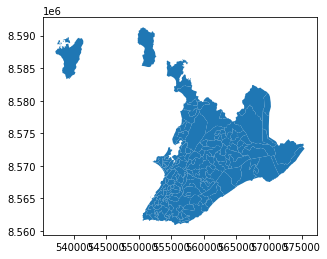

In [18]:
dados.plot()

In [19]:
for indice, linha in dados[0:10].iterrows():
    area_polig = linha['geometry'].area
    print(f"O polígono de índice {indice} possui uma área de {area_polig:.2f} m²")
    

O polígono de índice 0 possui uma área de 833906.06 m²
O polígono de índice 1 possui uma área de 4882107.72 m²
O polígono de índice 2 possui uma área de 4620815.04 m²
O polígono de índice 3 possui uma área de 1145097.45 m²
O polígono de índice 4 possui uma área de 704379.25 m²
O polígono de índice 5 possui uma área de 3382191.31 m²
O polígono de índice 6 possui uma área de 442994.67 m²
O polígono de índice 7 possui uma área de 3173077.22 m²
O polígono de índice 8 possui uma área de 456757.45 m²
O polígono de índice 9 possui uma área de 1102223.80 m²


In [20]:
# Criar uma coluna área 
dados['Area'] = dados.area
dados.head()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,nome,id_bairro,area_km2,geometry,Area
0,Palestina,105.0,0.833906,"POLYGON ((563547.010 8577348.034, 563562.794 8...",8.339061e+05
1,Paripe,156.0,4.882108,"POLYGON ((557201.475 8582312.816, 557226.534 8...",4.882108e+06
2,Patamares,2.0,4.620815,"POLYGON ((564935.025 8566706.503, 564934.976 8...",4.620815e+06
3,Pau da Lima,66.0,1.145097,"POLYGON ((560777.356 8572284.444, 560759.803 8...",1.145097e+06
4,Pau Miúdo,79.0,0.704379,"POLYGON ((555987.228 8567545.404, 556010.515 8...",7.043793e+05


In [21]:
dados = dados.drop(columns=['Area'])
dados.head()

,nome,id_bairro,area_km2,geometry
0,Palestina,105.0,0.833906,"POLYGON ((563547.010 8577348.034, 563562.794 8..."
1,Paripe,156.0,4.882108,"POLYGON ((557201.475 8582312.816, 557226.534 8..."
2,Patamares,2.0,4.620815,"POLYGON ((564935.025 8566706.503, 564934.976 8..."
3,Pau da Lima,66.0,1.145097,"POLYGON ((560777.356 8572284.444, 560759.803 8..."
4,Pau Miúdo,79.0,0.704379,"POLYGON ((555987.228 8567545.404, 556010.515 8..."


In [29]:
dados['area_ha'] = dados['area_km2'] * 100
dados.head()

,nome,id_bairro,area_km2,geometry,area_ha
0,Palestina,105.0,0.833906,"POLYGON ((563547.010 8577348.034, 563562.794 8...",83.390606
1,Paripe,156.0,4.882108,"POLYGON ((557201.475 8582312.816, 557226.534 8...",488.210772
2,Patamares,2.0,4.620815,"POLYGON ((564935.025 8566706.503, 564934.976 8...",462.081504
3,Pau da Lima,66.0,1.145097,"POLYGON ((560777.356 8572284.444, 560759.803 8...",114.509745
4,Pau Miúdo,79.0,0.704379,"POLYGON ((555987.228 8567545.404, 556010.515 8...",70.437925


In [30]:
# área máxima em km2
round(dados['area_km2'].max(), 2)

15.11

In [32]:
# área mínima em km2
dados['area_km2'].min()

0.13399222

In [34]:
# área média em km2
dados['area_km2'].mean()

1.8615500236809814

In [38]:
# Soma de todas as área em km2 
dados['area_km2'].sum() / dados['area_km2'].shape[0]

1.8615500236809814

# Selecionando um Bairro e Salvando

In [39]:
select = dados.loc[dados['nome'] == 'Paripe']

In [40]:
select.head()

,nome,id_bairro,area_km2,geometry,area_ha
1,Paripe,156.0,4.882108,"POLYGON ((557201.475 8582312.816, 557226.534 8...",488.210772


<AxesSubplot:>

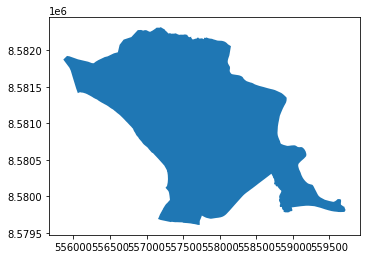

In [41]:
select.plot()

In [43]:
pasta_saida = r"/content/bairros_ssa/Recorte/bairros"

# Criar pasta
os.mkdir(pasta_saida)

In [44]:
arquivo_saida = os.path.join(pasta_saida, "ssa_bairro_paripe.shp")
print(arquivo_saida)

/content/bairros_ssa/Recorte/bairros/ssa_bairro_paripe.shp


In [45]:
# Salvando o arquivo
select.to_file(arquivo_saida)

# Agrupando GeoDataframe

In [46]:
dados.head()

,nome,id_bairro,area_km2,geometry,area_ha
0,Palestina,105.0,0.833906,"POLYGON ((563547.010 8577348.034, 563562.794 8...",83.390606
1,Paripe,156.0,4.882108,"POLYGON ((557201.475 8582312.816, 557226.534 8...",488.210772
2,Patamares,2.0,4.620815,"POLYGON ((564935.025 8566706.503, 564934.976 8...",462.081504
3,Pau da Lima,66.0,1.145097,"POLYGON ((560777.356 8572284.444, 560759.803 8...",114.509745
4,Pau Miúdo,79.0,0.704379,"POLYGON ((555987.228 8567545.404, 556010.515 8...",70.437925


In [ ]:
# Utilizar a DPA da Bahia com informações de TI e agrupar os municípios por TI
dados['SIGLA'].unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [ ]:
agrupar = dados.groupby('SIGLA')
agrupar

In [ ]:
agrupar.groups.keys()

dict_keys(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'])

In [ ]:
for chave, grupo in agrupar:
    print(f'Sigla: {chave}')
    print(f'Número de Municípios: {len(grupo)}')

Sigla: AC
Número de Municípios: 22
Sigla: AL
Número de Municípios: 102
Sigla: AM
Número de Municípios: 62
Sigla: AP
Número de Municípios: 16
Sigla: BA
Número de Municípios: 417
Sigla: CE
Número de Municípios: 184
Sigla: DF
Número de Municípios: 1
Sigla: ES
Número de Municípios: 78
Sigla: GO
Número de Municípios: 246
Sigla: MA
Número de Municípios: 217
Sigla: MG
Número de Municípios: 853
Sigla: MS
Número de Municípios: 79
Sigla: MT
Número de Municípios: 141
Sigla: PA
Número de Municípios: 144
Sigla: PB
Número de Municípios: 223
Sigla: PE
Número de Municípios: 185
Sigla: PI
Número de Municípios: 224
Sigla: PR
Número de Municípios: 399
Sigla: RJ
Número de Municípios: 92
Sigla: RN
Número de Municípios: 167
Sigla: RO
Número de Municípios: 52
Sigla: RR
Número de Municípios: 15
Sigla: RS
Número de Municípios: 499
Sigla: SC
Número de Municípios: 295
Sigla: SE
Número de Municípios: 75
Sigla: SP
Número de Municípios: 645
Sigla: TO
Número de Municípios: 139


In [ ]:
arquivo_saida = r"/content/sample_data/BR_Mucipios_2021"

resultado = os.path.join(arquivo_saida, "Resultados")

if not os.path.exists(resultado):
    print("Criando a pasta.")
    os.makedirs(resultado)
else:
    print("A pasta ja existe")

A pasta ja existe


In [ ]:
agrupar.head()

,NM_MUN,SIGLA,AREA_KM2,geometry,AREA_HA
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",706712.7
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",442657.1
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",131435.2
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",379300.0
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",278330.0
...,...,...,...,...,...
5326,Abadiânia,GO,1044.555,None,104455.5
5327,Acreúna,GO,1566.742,None,156674.2
5328,Adelândia,GO,115.385,None,11538.5
5329,Água Fria de Goiás,GO,2023.636,None,202363.6


In [ ]:
for chave, grupo in agrupar:
    nome_saida = f'SIGLA_{chave}.shp'
    print('Salvando o arquivo', os.path.basename(nome_saida))
    caminho_saida = os.path.join(resultado, nome_saida)
    grupo.to_file(caminho_saida)

Salvando o arquivo SIGLA_AC.shp
Salvando o arquivo SIGLA_AL.shp
Salvando o arquivo SIGLA_AM.shp
Salvando o arquivo SIGLA_AP.shp
Salvando o arquivo SIGLA_BA.shp
Salvando o arquivo SIGLA_CE.shp
Salvando o arquivo SIGLA_DF.shp
Salvando o arquivo SIGLA_ES.shp
Salvando o arquivo SIGLA_GO.shp
Salvando o arquivo SIGLA_MA.shp
Salvando o arquivo SIGLA_MG.shp
Salvando o arquivo SIGLA_MS.shp
Salvando o arquivo SIGLA_MT.shp
Salvando o arquivo SIGLA_PA.shp
Salvando o arquivo SIGLA_PB.shp
Salvando o arquivo SIGLA_PE.shp
Salvando o arquivo SIGLA_PI.shp
Salvando o arquivo SIGLA_PR.shp
Salvando o arquivo SIGLA_RJ.shp
Salvando o arquivo SIGLA_RN.shp
Salvando o arquivo SIGLA_RO.shp
Salvando o arquivo SIGLA_RR.shp
Salvando o arquivo SIGLA_RS.shp
Salvando o arquivo SIGLA_SC.shp
Salvando o arquivo SIGLA_SE.shp
Salvando o arquivo SIGLA_SP.shp
Salvando o arquivo SIGLA_TO.shp


# Trabalhando com Coordenadas

Para saber o código do EPSG da região de interesse existem diversos sites, mas eu costumo utilizar esse aqui: 
https://spatialreference.org/

In [ ]:
import geopandas as gpd

In [ ]:
arquivo = r"/content/sample_data/BR_Mucipios_2021/Resultados/SIGLA_RR.shp"

In [ ]:
dados_rr = gpd.read_file(arquivo)
dados_rr.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-61.33730 4.31159, -61.33656 4.31136..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-63.61441 3.73768, -63.61052 3.73712..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-60.47539 3.60573, -60.47501 3.60507..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-59.88384 3.56296, -59.88244 3.56296..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-60.56198 2.87580, -60.56090 2.87470..."


In [ ]:
# Verificar o sistema de coordenadas
dados_rr.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Criar uma cópia do arquivo
dados_rr_epsg_4674 = dados_rr.copy()

# Reprojetar para a coordenada da região
dados_rr = dados_rr.to_crs(epsg=31982)

In [ ]:
dados_rr.crs

<Derived Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
dados_rr.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-653293.122 10484456.542, -653210.82..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-912135.945 10423391.884, -911694.57..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-557124.128 10404082.309, -557082.01..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-490624.014 10398620.932, -490467.19..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-567654.024 10322366.237, -567532.70..."


In [ ]:
dados_sc['AREA_M2'] = dados_rr.area
dados_rr.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-653293.122 10484456.542, -653210.82..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-912135.945 10423391.884, -911694.57..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-557124.128 10404082.309, -557082.01..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-490624.014 10398620.932, -490467.19..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-567654.024 10322366.237, -567532.70..."


In [ ]:
dados_rr_epsg_4674.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-61.33730 4.31159, -61.33656 4.31136..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-63.61441 3.73768, -63.61052 3.73712..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-60.47539 3.60573, -60.47501 3.60507..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-59.88384 3.56296, -59.88244 3.56296..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-60.56198 2.87580, -60.56090 2.87470..."


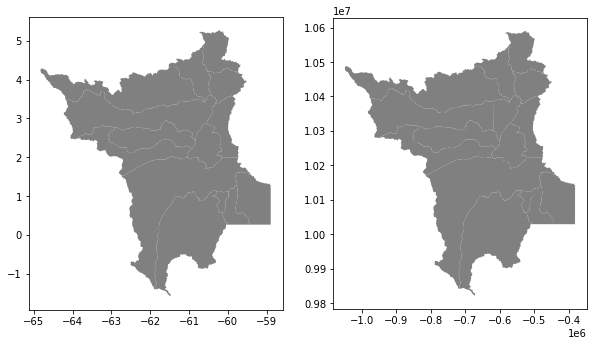

In [ ]:
import matplotlib.pyplot as plt

# Fazendo um plot do lado do outro

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

dados_rr_epsg_4674.plot(ax=ax1, facecolor='gray')
dados_rr.plot(ax=ax2, facecolor='gray')

# Definir a proporção como 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)


In [ ]:
# Salvar o arquivo

arquivo_saida = r"/content/sample_data/RR_Municipios_2021/RR_Municipios_2021_EPSG_31982.shp"

dados_rr.to_file(arquivo_saida)